In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
from keras import preprocessing
import numpy as np
import tensorflow as tf

In [ ]:
drive.mount('/gdrive', True)
# !ls '/gdrive/My Drive/datasets/cats_dogs_dataset'

Mounted at /gdrive


In [ ]:
dataset_path = glob.glob(f"/gdrive/My Drive/datasets/cats_dogs_dataset/dogs/*.*")
image_dog = []
for image_path in dataset_path:
#  image = preprocessing.image.load_img(image_path, target_size=(96, 96))
 image = cv2.imread(image_path)
#  image = resizeAndPad(image, (width, height), 0) 
 image = image[...,::-1]
 x = preprocessing.image.img_to_array(image)
 image_dog.append(x)

KeyboardInterrupt: ignored

In [ ]:
preprocessed_data = np.load("/gdrive/My Drive/datasets/fish_dataset/body_preprocessed3.npz")

In [ ]:
X = preprocessed_data['X']
X.shape

(268, 200, 200, 3)

In [ ]:
y = preprocessed_data['y']
y.shape

(268, 4)

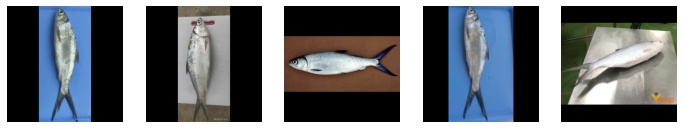

In [ ]:
plt.figure(figsize=(12,8))
for i, x in enumerate(X[:5]):
 plt.subplot(1, 5, i+1)
 image = preprocessing.image.array_to_img(x)
 plt.imshow(image)
 plt.axis('off')

plt.show()

In [ ]:
class_name = ['BANDENG', 'GURAME', 'KERAPU', 'NILA']

width = 200
height = 200

In [ ]:
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 25
batch_size = 32
color_channels = 3

def build_model_tf(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,lr=lr):
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.Conv2D(conv_1, (3,3),input_shape=(width, height, color_channels),activation='relu'))
 model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
 model.add(tf.keras.layers.Dropout(conv_1_drop))
 
 model.add(tf.keras.layers.Conv2D(conv_2, (3,3),activation='relu'))
 model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
 model.add(tf.keras.layers.Dropout(conv_2_drop))
 model.add(tf.keras.layers.Flatten())

 model.add(tf.keras.layers.Dense(dense_1_n, activation='relu'))
 model.add(tf.keras.layers.Dropout(dense_1_drop))
 model.add(tf.keras.layers.Dense(dense_2_n, activation='relu'))
 model.add(tf.keras.layers.Dropout(dense_2_drop))

 model.add(tf.keras.layers.Dense(len(class_name), activation='softmax'))

 model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
 return model

In [ ]:
model2 = build_model_tf()
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0

In [ ]:
model2.fit(X, y, epochs=25)

Epoch 1/25
9/9 [==============================] - 15s 2s/step - loss: 6.7889 - accuracy: 0.2683
Epoch 2/25
9/9 [==============================] - 13s 1s/step - loss: 2.0055 - accuracy: 0.2418
Epoch 3/25
9/9 [==============================] - 13s 1s/step - loss: 1.3592 - accuracy: 0.3268
Epoch 4/25
9/9 [==============================] - 13s 1s/step - loss: 1.3543 - accuracy: 0.3692
Epoch 5/25
9/9 [==============================] - 13s 1s/step - loss: 1.3323 - accuracy: 0.3768
Epoch 6/25
9/9 [==============================] - 13s 1s/step - loss: 1.2688 - accuracy: 0.4742
Epoch 7/25
9/9 [==============================] - 13s 1s/step - loss: 1.1837 - accuracy: 0.4778
Epoch 8/25
9/9 [==============================] - 13s 1s/step - loss: 1.0699 - accuracy: 0.5780
Epoch 9/25
9/9 [==============================] - 14s 1s/step - loss: 1.0265 - accuracy: 0.5500
Epoch 10/25
9/9 [==============================] - 13s 1s/step - loss: 0.7813 - accuracy: 0.7127
Epoch 11/25
9/9 [======================

In [ ]:
model2.save('fish_classification.h5')

In [ ]:
def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) == 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img


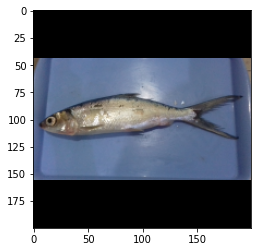

BANDENG


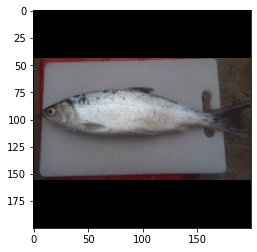

BANDENG


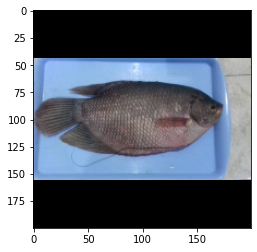

GURAME


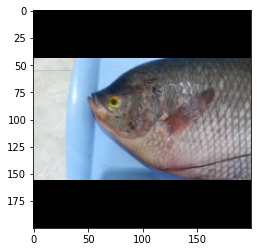

GURAME


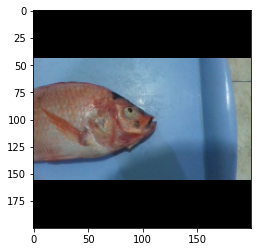

NILA


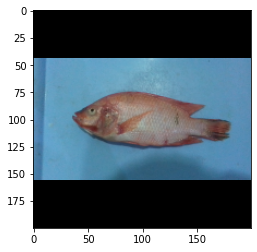

NILA


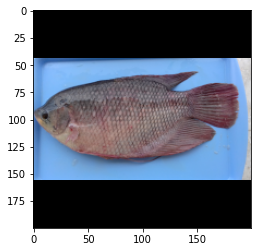

GURAME


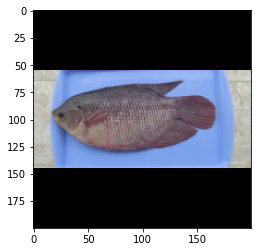

GURAME


In [ ]:
for i in range(8):
  file_name = '/tmp/'+str(i)+'.jpg'
  image = cv2.imread(file_name)
  image = resizeAndPad(image, (width, height))
  image = image[...,::-1]
  plt.imshow(image)
  plt.show()
  type_predict = np.expand_dims(image, axis=0)
  pred = model2.predict(type_predict)
  print(class_name[np.argmax(pred)])

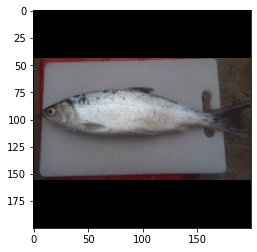

[[1. 0. 0. 0.]]
BANDENG


In [ ]:
file_name = '/tmp/1.jpg'
image = cv2.imread(file_name)
image = resizeAndPad(image, (width, height))
image = image[...,::-1]
plt.imshow(image)
plt.show()
type_predict = np.expand_dims(image, axis=0)
pred = model2.predict(type_predict)
print(pred)
print(class_name[np.argmax(pred)])

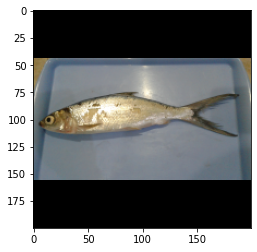

[[1. 0. 0. 0.]]
BANDENG


In [ ]:
file_name = '/tmp/20210126_193317.jpg'
image = cv2.imread(file_name)
image = resizeAndPad(image, (width, height))
image = image[...,::-1]
plt.imshow(image)
plt.show()
type_predict = np.expand_dims(image, axis=0)
pred = model2.predict(type_predict)
print(pred)
print(class_name[np.argmax(pred)])

In [ ]:
model2.save('/tmp/fish_classification.h5')

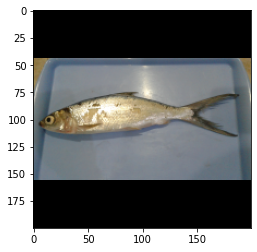

[[1. 0. 0. 0.]]
BANDENG


In [ ]:
model_load = tf.keras.models.load_model('/tmp/fish_classification.h5')
file_name = '/tmp/20210126_193317.jpg'
image = cv2.imread(file_name)
image = resizeAndPad(image, (width, height))
image = image[...,::-1]
plt.imshow(image)
plt.show()
type_predict = np.expand_dims(image, axis=0)
pred = model_load.predict(type_predict)
print(pred)
print(class_name[np.argmax(pred)])

In [ ]:
from tensorflow.contrib import lite
converter = lite.TFLiteConverter.from_keras_model_file( '/tmp/fish_classification.h5' ) # Your model's name
model = converter.convert()
file = open( '/tmp/fish_classification.tflite' , 'wb' ) 
file.write( model )

ModuleNotFoundError: ignored

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/tmp/fish_classification.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("/tmp/fish_classification.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpq4b6ly17/assets


304125220